In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
# Définis le chemein du fichier
file_path = r"C:\Users\Dell\Documents\PortofolioProject\TELECOMMUNICATION APPLICATION\Prediction_Data.xlsx"

# Définir le nom de la feuille à partir de laquelle lire les données
sheet_name = 'vw_TelecomData'

# Lire les données de la feuille spécifiée dans un DataFrame pandas
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Afficher les premières lignes des données récupérées
print(data.head())

  Customer_ID  Gender  Age Married          City  Number_of_Referrals  \
0  0002-ORFBO  Female   37     Yes  Frazier Park                    2   
1  0003-MKNFE    Male   46      No      Glendale                    0   
2  0004-TLHLJ    Male   50      No    Costa Mesa                    0   
3  0011-IGKFF    Male   78     Yes      Martinez                    1   
4  0013-EXCHZ  Female   75     Yes     Camarillo                    3   

   Tenure_in_Months    Offer Phone_Service Multiple_Lines  ...  \
0                 9      NaN           Yes             No  ...   
1                 9      NaN           Yes            Yes  ...   
2                 4  Offer E           Yes             No  ...   
3                13  Offer D           Yes             No  ...   
4                 3      NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card           65.6        593.30           0.0   
1      Credit Card            NaN 

In [3]:
# Supprimer les colonnes qui ne seront pas utilisées pour la prédiction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

# Liste des colonnes à coder
columns_to_encode = [
    'Gender', 'Married', 'City', 'Offer', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Tech_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Encoder les variables catégorielles à l’exception de la variable cible
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Encodez manuellement la variable cible 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Fractionner les données en entités et cible
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Fractionnement des données en ensembles d’entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Initialiser le classificateur Random Forest 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[889  46]
 [120 263]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       935
           1       0.85      0.69      0.76       383

    accuracy                           0.87      1318
   macro avg       0.87      0.82      0.84      1318
weighted avg       0.87      0.87      0.87      1318



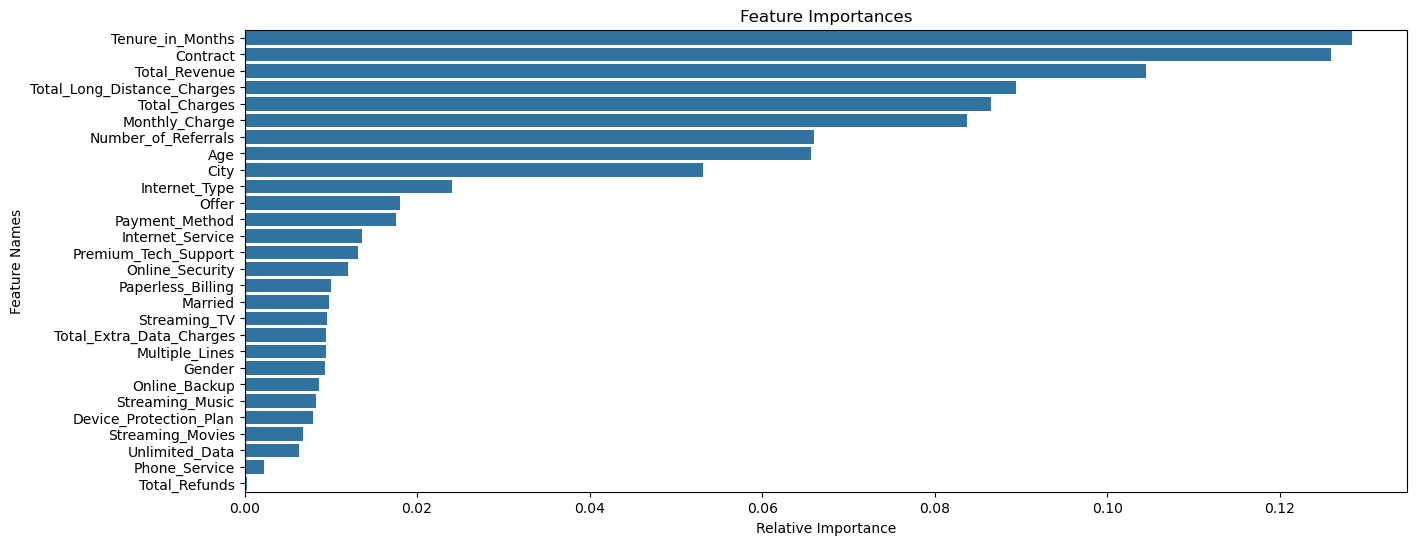

In [7]:
# Faire des prédictions
y_pred = rf_model.predict(X_test)

# Évaluer le modèle
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Sélection de caractéristiques à l’aide de l’importance de la caractéristique
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Tracer les importances des fonctionnalités
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [9]:
# Définis le chemein du fichier
file_path = r"C:\Users\Dell\Documents\PortofolioProject\TELECOMMUNICATION APPLICATION\Prediction_Data.xlsx"

# Définir le nom de la feuille à partir de laquelle lire les données
sheet_name = 'vw_JoinData'

# Lire les données de la feuille spécifiée dans un DataFrame pandas
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Afficher les premières lignes des données récupérées
print(new_data.head())

# Conservez le DataFrame d’origine pour conserver les colonnes non codées
original_data = new_data.copy()

# Conserver la colonne Customer_ID 
customer_ids = new_data['Customer_ID']

# Supprimer les colonnes qui ne seront pas utilisées pour la prédiction
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encoder des variables catégorielles à l’aide des encodeurs d’étiquettes enregistrés
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Faire des prédictions
new_predictions = rf_model.predict(new_data)

# Ajouter des prédictions au DataFrame d’origine
original_data['Customer_Status_Predicted'] = new_predictions

# Filtrez le DataFrame pour n’inclure que les enregistrements prédits comme « désordonnés »
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Enregistrer les résultats
original_data.to_csv(r"C:\Users\Dell\Documents\PortofolioProject\TELECOMMUNICATION APPLICATION\Predictions.csv", index=False)
# Encoder les variables catégorielles à l’exception de la variable cible
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Encodez manuellement la variable cible 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Fractionner les données en entités et cible
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Fractionnement des données en ensembles d’entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialiser le Random Forest 

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrainer le modèle
rf_model.fit(X_train, y_train)

print(data.isnull().sum())  # Vérifie toutes les colonnes
print(data['Customer_Status'].isnull().sum())

  Customer_ID  Gender  Age Married           City  Number_of_Referrals  \
0  0021-IKXGC  Female   72      No     San Marcos                    0   
1  0030-FNXPP  Female   22      No         Keeler                    0   
2  0082-LDZUE    Male   54      No      Calistoga                    0   
3  0139-IVFJG  Female   19     Yes       Temecula                   10   
4  0178-CIIKR  Female   60      No  Crows Landing                    0   

   Tenure_in_Months    Offer Phone_Service Multiple_Lines  ...  \
0                 1  Offer E           Yes            Yes  ...   
1                 3      NaN           Yes             No  ...   
2                 1  Offer E           Yes             No  ...   
3                 2      NaN           Yes             No  ...   
4                 3      NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal          72.10          72.1           0.0   
1      Credit Card          

ValueError: Input y contains NaN.